In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [3]:
plt.rcParams.update({'figure.figsize':(8,6),       # Increase figure size
                     'font.size':20,               # Increase font size
                     'mathtext.fontset':'cm',      # Change math font to Computer Modern
                     'mathtext.rm':'serif',        # Documentation recommended follow-up
                     'lines.linewidth':5,          # Thicker plot lines
                     'lines.markersize':12,        # Larger plot points
                     'axes.linewidth':2,           # Thicker axes lines (but not too thick)
                     'xtick.major.size':8,         # Make the x-ticks longer (our plot is larger!)
                     'xtick.major.width':2,        # Make the x-ticks wider
                     'ytick.major.size':8,         # Ditto for y-ticks
                     'ytick.major.width':2,        # Ditto for y-ticks
                     'xtick.direction':'in', 
                     'ytick.direction':'in'})

In [6]:
features = ['Formation energy [eV/atom]', 'Stability [eV/atom]', 'Band gap [eV]']
df = pd.read_csv('cleaned_data.csv')
df = df.dropna(subset=features)
print(f'There are {len(df)} rows of the data remaining.')
display(df.head())

There are 4914 rows of the data remaining.


,Chemical formula,A,B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,1.12,1.12,cubic,-2.732,0.848,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,1.12,0.95,orthorhombic,-1.957,-0.055,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,1.12,0.54,cubic,-3.532,-0.110,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,1.12,0.52,orthorhombic,-2.398,0.224,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,1.12,0.93,orthorhombic,-2.006,-0.056,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807


In [8]:
X = df[features]
# X = df[['atomic_number']]    # uncomment this line and see what happens!
y = df['Vacancy energy [eV/O atom]']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
lr = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr, X_scaled, y, scoring='neg_root_mean_squared_error', cv=kfold)
print(f'The average CV score is {-np.mean(scores):.3f}.')

The average CV score is 0.000.


In [11]:
lr.fit(X_scaled, y)
yhat = lr.predict(X_scaled)
print(f'The slopes are {lr.coef_} and the intercept term is {lr.intercept_}')

The slopes are [-1.82450531e-15  8.88178420e-16 -4.44089210e-16  4.29419227e+00] and the intercept term is -1.2131381766381766


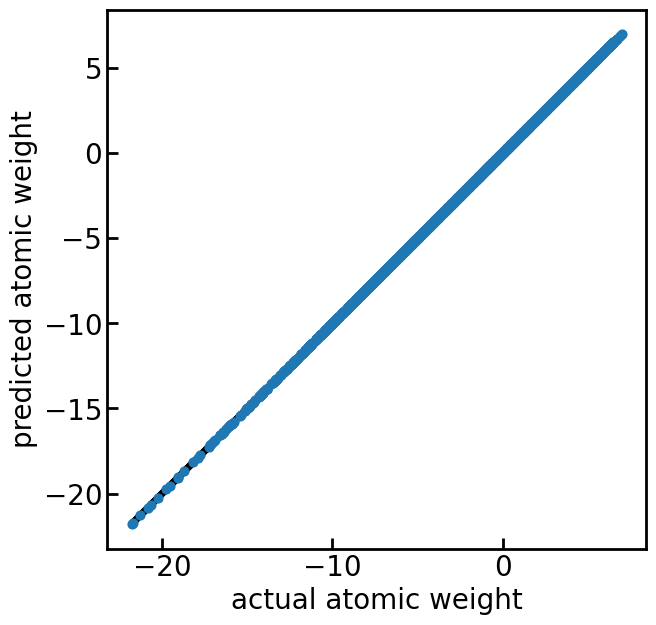

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y, yhat, s=40)
yhat = cross_val_predict(lr, X_scaled, y, cv=kfold)
ax.plot(y, y, c='k', zorder=-5)
ax.set_xlabel('actual atomic weight')
ax.set_ylabel('predicted atomic weight')
ax.set_aspect('equal')
plt.show()

## Handling the missing values

In [15]:
missing_value=["NaN","-"," ","",np.nan]
df = pd.read_csv("ABO3perovskites.csv", na_values=missing_value)

In [16]:
df.isnull().sum()

Chemical formula                0
A                               0
B                               0
Radius A [ang]                  0
Radius B [ang]                  0
Lowest distortion              53
Formation energy [eV/atom]     53
Stability [eV/atom]            53
Volume per atom [A^3/atom]     53
Band gap [eV]                  53
a [ang]                        53
b [ang]                        53
c [ang]                        53
alpha [deg]                    53
beta [deg]                     53
gamma [deg]                    53
Vacancy energy [eV/O atom]    415
dtype: int64

In [28]:
#df.isnull().any()

In [29]:
#df.head()

In [30]:
#df.describe()

In [31]:
df.dropna()

,Chemical formula,A,B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,1.12,1.12,cubic,-2.732,0.848,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,1.12,0.95,orthorhombic,-1.957,-0.055,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,1.12,0.54,cubic,-3.532,-0.110,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,1.12,0.52,orthorhombic,-2.398,0.224,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,1.12,0.93,orthorhombic,-2.006,-0.056,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,0.89,0.62,cubic,-1.637,1.196,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,0.89,0.90,cubic,-2.126,1.422,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,0.89,0.95,orthorhombic,-3.455,0.205,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,0.89,0.74,cubic,-1.630,1.210,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [33]:
new_df = df.dropna()

In [37]:
new_df.describe()

,Radius A [ang],Radius B [ang],Formation energy [eV/atom],Stability [eV/atom],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
count,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,0.978789,0.807776,-1.662587,0.740829,13.669114,0.360123,4.609098,4.689788,5.400528,88.309015,88.310338,88.307285,-1.213138
std,0.341622,0.238485,0.985653,0.617425,2.716747,0.902904,0.804624,0.905752,1.921851,7.012785,7.050569,7.016509,4.294629
min,0.270000,0.270000,-3.844000,-0.567000,6.741000,0.000000,3.230000,3.230000,3.230000,49.400000,30.000000,49.400000,-21.785000
25%,0.680000,0.630000,-2.389000,0.218250,11.700250,0.000000,3.966000,3.966250,3.988000,90.000000,90.000000,90.000000,-3.531500
50%,0.930000,0.760000,-1.735000,0.665500,13.345000,0.000000,4.308000,4.308000,4.330000,90.000000,90.000000,90.000000,-0.713000
75%,1.190000,0.950000,-0.981250,1.105000,15.651000,0.000000,5.385000,5.624000,7.526500,90.000000,90.000000,90.000000,1.825500
max,1.880000,1.670000,1.879000,3.927000,25.247000,6.221000,6.893000,7.369000,13.158000,90.000000,109.000000,90.000000,6.962000


In [38]:
new_df.to_csv("cleaned_data.csv")